In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [2]:
control_arabi_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
control_arabi_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
control_arabi_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


control_arabi= pd.DataFrame(
    data=zip(
        control_arabi_1["Reads"],
        control_arabi_2["Reads"],
        control_arabi_3["Reads"],
    ),
    columns=["arabi control Rep 1", "arabi control Rep 2" ,"arabi control Rep 3",],
    index=control_arabi_1.index,
)


In [3]:
control_arabi

,arabi control Rep 1,arabi control Rep 2,arabi control Rep 3
AT1G01010,42,47,73
AT1G01020,92,58,84
AT1G03987,0,0,1
AT1G01030,44,20,37
AT1G01040,431,318,455
...,...,...,...
ArthCt118,0,0,0
ArthCp083,0,0,1
ArthCt111,0,0,0
ArthCp084,2,0,0


In [4]:
test_arabi_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_cold/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
test_arabi_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_cold/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
test_arabi_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Arabi/Arabi_cold/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


test_arabi= pd.DataFrame(
    data=zip(
        test_arabi_1["Reads"],
        test_arabi_2["Reads"],
        test_arabi_3["Reads"],
    ),
    columns=["arabi test Rep 1", "arabi test Rep 2" ,"arabi test Rep 3",],
    index=test_arabi_1.index,
)


In [5]:
test_arabi

,arabi test Rep 1,arabi test Rep 2,arabi test Rep 3
AT1G01010,61,163,97
AT1G01020,76,171,108
AT1G03987,0,1,0
AT1G01030,25,42,17
AT1G01040,430,1125,651
...,...,...,...
ArthCt118,0,0,0
ArthCp083,0,0,0
ArthCt111,0,0,0
ArthCp084,0,0,0


In [6]:
combined_arabi = pd.concat([control_arabi, test_arabi], axis=1)

In [7]:
combined_arabi

,arabi control Rep 1,arabi control Rep 2,arabi control Rep 3,arabi test Rep 1,arabi test Rep 2,arabi test Rep 3
AT1G01010,42,47,73,61,163,97
AT1G01020,92,58,84,76,171,108
AT1G03987,0,0,1,0,1,0
AT1G01030,44,20,37,25,42,17
AT1G01040,431,318,455,430,1125,651
...,...,...,...,...,...,...
ArthCt118,0,0,0,0,0,0
ArthCp083,0,0,1,0,0,0
ArthCt111,0,0,0,0,0,0
ArthCp084,2,0,0,0,0,0


In [8]:
arabi_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Control", "Control", "Control", "Test", "Test", "Test"],
    index=[
        "arabi control Rep 1",
        "arabi control Rep 2",
        "arabi control Rep 3",
        "arabi test Rep 1",
        "arabi test Rep 2",
        "arabi test Rep 3",
    ],
)

In [9]:
control_rice_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
control_rice_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
control_rice_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)



control_rice = pd.DataFrame(
    data=zip(
        control_rice_1["Reads"],
        control_rice_2["Reads"],
        control_rice_3["Reads"],
    ),
    columns=["rice control Rep 1", "rice control Rep 2", "rice control Rep 3",],
    index=control_rice_1.index,
)


In [11]:
control_rice

,rice control Rep 1,rice control Rep 2,rice control Rep 3
Os01g0100100,1401,1082,1712
Os01g0100200,0,2,1
Os01g0100300,0,0,0
Os01g0100400,128,89,128
Os01g0100466,0,0,0
...,...,...,...
Os12g0641200,9,3,2
Os12g0641300,13,14,15
Os12g0641400,3020,2189,2607
Os12g0641500,2500,2022,3107


In [12]:
test_rice_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_cold/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
test_rice_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_cold/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
test_rice_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Rice_arabi_cold/Rice/Rice_cold/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


test_rice = pd.DataFrame(
    data=zip(
        test_rice_rep_1["Reads"],
        test_rice_rep_2["Reads"],
        test_rice_rep_3["Reads"],
    ),
    columns=["rice test Rep 1", "rice test Rep 2", "rice test Rep 3", ],
    index=control_rice_1.index,
)

In [13]:
test_rice

,rice test Rep 1,rice test Rep 2,rice test Rep 3
Os01g0100100,602,666,744
Os01g0100200,2,0,0
Os01g0100300,0,0,0
Os01g0100400,56,51,14
Os01g0100466,0,0,0
...,...,...,...
Os12g0641200,2,3,4
Os12g0641300,28,23,41
Os12g0641400,5060,6080,5053
Os12g0641500,1855,2187,2216


In [14]:
combined_rice = pd.concat([control_rice, test_rice], axis=1)
combined_rice

,rice control Rep 1,rice control Rep 2,rice control Rep 3,rice test Rep 1,rice test Rep 2,rice test Rep 3
Os01g0100100,1401,1082,1712,602,666,744
Os01g0100200,0,2,1,2,0,0
Os01g0100300,0,0,0,0,0,0
Os01g0100400,128,89,128,56,51,14
Os01g0100466,0,0,0,0,0,0
...,...,...,...,...,...,...
Os12g0641200,9,3,2,2,3,4
Os12g0641300,13,14,15,28,23,41
Os12g0641400,3020,2189,2607,5060,6080,5053
Os12g0641500,2500,2022,3107,1855,2187,2216


In [16]:
rice_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Control ", "Control", "Control", "Test","Test","Test",],
    index=[

        "rice control Rep 1",
        "rice control Rep 2",
        "rice control Rep 3",
        "rice test Rep 1",
        "rice test Rep 2",
        "rice test Rep 3",

    ],
)

In [17]:
combined_rice = combined_rice.T




In [18]:
combined_arabi = combined_arabi.T

In [19]:
combined_arabi.to_csv("/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_reads.csv")
combined_rice.to_csv("/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_reads.csv")

In [20]:
genes_to_keep_arabi = combined_arabi.columns[combined_arabi.sum(axis=0) >= 100]
combined_arabi = combined_arabi[genes_to_keep_arabi]
inference_arabi = DefaultInference(n_cpus=30)
dds_arabi = DeseqDataSet(
    counts=combined_arabi,
    metadata=arabi_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_arabi,
)
dds_arabi.deseq2()
stat_res_arabi = DeseqStats(dds_arabi, inference=inference_arabi)
stat_res_arabi.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.25 seconds.

Fitting dispersion trend curve...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 1.14 seconds.

Fitting LFCs...
... done in 1.05 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Test vs Control
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AT1G01010   72.799064        0.288381  0.238023  1.211569  0.225677  0.312102
AT1G01020   92.481265       -0.070804  0.206666 -0.342603  0.731897  0.797898
AT1G01030   31.136860       -0.912607  0.352845 -2.586425  0.009698  0.020588
AT1G01040  518.650594        0.175542  0.122584  1.432022  0.152138  0.224275
AT1G01050  191.242344       -0.386326  0.160208 -2.411404  0.015891  0.032108
...               ...             ...       ...       ...       ...       ...
ArthCp049   35.255177        0.274327  0.369498  0.742432  0.457826  0.555511
ArthCr087   30.847153       -0.797528  0.388240 -2.054214  0.039955  0.071976
ArthCp072   15.538941        0.315366  0.481090  0.655524  0.512131  0.607386
ArthCr089   60.853653       -0.248527  0.570191 -0.435866  0.662934  0.741176
ArthCr088   28.293265       -0.859586  0.403856 -2.128448  0.033300  0.061317

[177

... done in 0.96 seconds.



In [21]:
genes_to_keep = combined_rice.columns[combined_rice.sum(axis=0) >= 100]
combined_rice = combined_rice[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_rice,
    metadata=rice_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res_rice = DeseqStats(dds, inference=inference)
stat_res_rice.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.22 seconds.

Fitting dispersion trend curve...
... done in 0.53 seconds.

/home/passala/miniconda3/envs/Py_deseq/lib/python3.12/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.43 seconds.

Fitting LFCs...
... done in 1.09 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Control  vs Control
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Os01g0100100   987.421316        0.048133  0.210712  0.228429  0.819313   
Os01g0100400    73.560620        0.272541  0.599612  0.454529  0.649448   
Os01g0100500   776.423823        0.159056  0.214962  0.739924  0.459346   
Os01g0100600   299.542810       -0.088580  0.270434 -0.327547  0.743254   
Os01g0100700   731.051223       -0.041348  0.232079 -0.178163  0.858595   
...                   ...             ...       ...       ...       ...   
Os12g0640900    65.193996        0.057298  0.502294  0.114073  0.909180   
Os12g0641100  2303.604716        0.033248  0.178462  0.186302  0.852208   
Os12g0641300    23.215047       -0.147560  0.870252 -0.169561  0.865356   
Os12g0641400  4125.217851        0.347367  0.179335  1.936971  0.052749   
Os12g0641500  2270.300897        0.004482  0.182323  0.024585  0.980386   

                  padj  
Os01g010010

... done in 0.99 seconds.



In [22]:
full_results_rice = stat_res_rice.results_df
full_results_rice
full_results_arabi = stat_res_arabi.results_df

In [23]:
full_results_rice.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_gene_results.csv')
full_results_arabi.to_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_gene_results.csv')

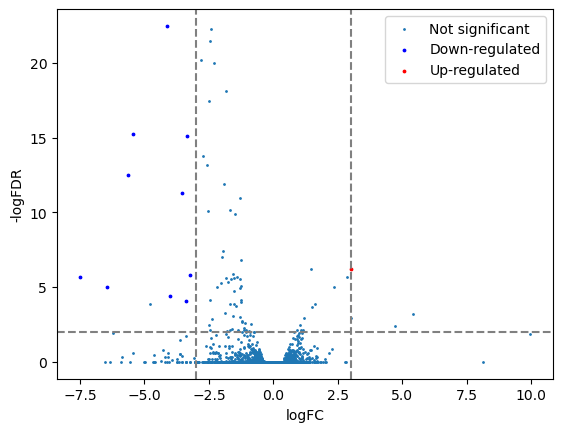

In [24]:
plt.scatter(x=full_results_rice['log2FoldChange'],y=full_results_rice['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down_arabi = full_results_rice[(full_results_rice['log2FoldChange']<=-3)&(full_results_rice['padj']<=0.0001)]
up_arabi = full_results_rice[(full_results_rice['log2FoldChange']>=3)&(full_results_rice['padj']<=0.0001)]

plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [25]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Os05g0519700,84.095025,3.01336,0.488565,6.167781,6.925477e-10,6.232555e-07


In [26]:
up

NameError: name 'up' is not defined

/tmp/ipykernel_91654/2057838856.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=full_results_arabi['log2FoldChange'],y=full_results_arabi['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")
/tmp/ipykernel_91654/2057838856.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")


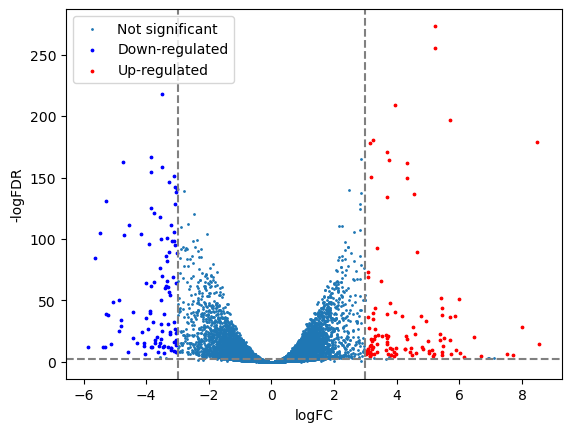

In [27]:
plt.scatter(x=full_results_arabi['log2FoldChange'],y=full_results_arabi['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = full_results_arabi[(full_results_arabi['log2FoldChange']<=-3)&(full_results_arabi['padj']<=0.0001)]
up = full_results_arabi[(full_results_arabi['log2FoldChange']>=3)&(full_results_arabi['padj']<=0.0001)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()